In [7]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

In [6]:
# pickle_path = '../output_mp/rates_delay_loss_TD3_WIRED_35mbps_600_delay_False_norm_states_True_tuned_False.pickle'
# l_rate = pd.read_pickle(pickle_path)
# conf_name = pickle_path.split("/")[2].split(".")[0][17:]
# print(conf_name)
# trace_name = "./traces/" + pickle_path.split("_")[5] + "_" + pickle_path.split("_")[6] + ".json"
# print(trace_name)
# len(l_rate[trace_name])

In [4]:
result_dir = os.listdir("/home/det_user/dmarkudova/RL_rtc/output_mp/")
big_list_results = []

for filename in result_dir:
    pickle_path = "../output_mp/" + filename
    l_rate = pd.read_pickle(pickle_path)
    conf_name = pickle_path.split("/")[2].split(".")[0][17:]
    if "big_trace2" in pickle_path:
        trace_name = "./big_trace/big_trace2.json"
    else:
        trace_name = "./traces/" + pickle_path.split("_")[5] + "_" + pickle_path.split("_")[6] + ".json"
    
    d_splitted = conf_name.split("_")
    alg = d_splitted[0]
    step_time = int(d_splitted[3])
    if d_splitted[5] == "True":
        delay_states = True
    else:
        delay_states = False
    if d_splitted[8] == "True":
        normalize_states = True
    else:
        normalize_states = False
    if d_splitted[10].split(".")[0] == "True":
        tuned = True
    else:
        tuned = False
    
    avg_reward_list = []
    cum_reward_list = []
    for i in range(15):
        if i in l_rate[trace_name].keys():
            reward_series = pd.Series(l_rate[trace_name][i]["reward"])
            avg_reward_list.append(reward_series.mean())
            cum_reward_list.append(reward_series.sum())
    
    d_final = {
         'trace': trace_name.split("/")[2].split(".")[0],
         'delay_states': delay_states,
         'normalize_states': normalize_states,
         'step_time': step_time,
         'alg': alg,
         'tuned': tuned,
         'last_reward': cum_reward_list[-1],
         'cum_reward': cum_reward_list,
         'avg_reward': avg_reward_list,
         'name': conf_name,
        }
    
    big_list_results.append(d_final)

In [5]:
df = pd.DataFrame(big_list_results)
df

,trace,delay_states,normalize_states,step_time,alg,tuned,last_reward,cum_reward,avg_reward,name
0,4G_3mbps,False,True,400,TD3,True,-80.495069,"[-82.89147700000001, -72.38274, -70.8922977, -...","[-0.5417743594771243, -0.4730898039215687, -0....",TD3_4G_3mbps_400_delay_False_norm_states_True_...
1,big_trace2,False,True,600,SAC,False,-645.274660,"[-719.5248039999999, -693.9548601, -692.368870...","[-0.540183786786787, -0.5209871322072073, -0.5...",SAC_big_trace2_600_delay_False_norm_states_Tru...
2,WIRED_200kbps,False,True,400,SAC,False,205.404080,"[204.12852, 136.8304, 135.86536, 121.205080000...","[0.36582172043010697, 0.24521577060931893, 0.2...",SAC_WIRED_200kbps_400_delay_False_norm_states_...
3,WIRED_200kbps,True,False,400,SAC,True,-9.753440,"[-9.74824, -9.753440000000001, -9.753440000000...","[-0.017469964157706096, -0.017479283154121866,...",SAC_WIRED_200kbps_400_delay_True_norm_states_F...
4,WIRED_900kbps,False,True,400,SAC,True,75.290240,"[63.150600000000004, 67.36788000000001, 63.466...","[0.4355213793103449, 0.46460606896551754, 0.43...",SAC_WIRED_900kbps_400_delay_False_norm_states_...
...,...,...,...,...,...,...,...,...,...,...
284,WIRED_200kbps,False,False,200,SAC,False,-19.189400,"[-18.399079999999998, -33.94972, -37.16448, -3...","[-0.016501417040358738, -0.030448179372197313,...",SAC_WIRED_200kbps_200_delay_False_norm_states_...
285,4G_3mbps,True,True,200,TD3,True,-119.120683,"[-146.40009759999998, -120.23345309999999, -12...","[-0.4800003200000002, -0.3942080429508196, -0....",TD3_4G_3mbps_200_delay_True_norm_states_True_t...
286,WIRED_35mbps,True,True,200,TD3,False,-15.419165,"[-15.4020051, -15.5979967, -14.417606799999998...","[-0.05016939771986972, -0.05080780684039084, -...",TD3_WIRED_35mbps_200_delay_True_norm_states_Tr...
287,4G_700kbps,True,True,600,SAC,True,19.090760,"[20.838880000000003, 18.667720000000003, 15.73...","[0.11707235955056189, 0.10487483146067414, 0.0...",SAC_4G_700kbps_600_delay_True_norm_states_True...


In [8]:
df.trace.unique()

array(['4G_3mbps', 'big_trace2', 'WIRED_200kbps', 'WIRED_900kbps',
       '4G_700kbps', 'WIRED_35mbps', '4G_500kbps'], dtype=object)

In [10]:
df[df.trace == "4G_700kbps"]

,trace,delay_states,normalize_states,step_time,alg,tuned,last_reward,cum_reward,avg_reward,name
5,4G_700kbps,False,True,400,TD3,True,39.89868,"[-10.7584, 29.9526, 21.988360000000007, 31.932...","[-0.040293632958801506, 0.11218202247191007, 0...",TD3_4G_700kbps_400_delay_False_norm_states_Tru...
13,4G_700kbps,True,True,400,SAC,False,44.12052,"[30.09668, 26.777, 34.7424, 27.69236, 31.92172...","[0.1127216479400749, 0.10028838951310866, 0.13...",SAC_4G_700kbps_400_delay_True_norm_states_True...
22,4G_700kbps,False,True,600,SAC,True,13.35068,"[14.74008, 13.939520000000002, 15.057800000000...","[0.08280943820224716, 0.07831191011235959, 0.0...",SAC_4G_700kbps_600_delay_False_norm_states_Tru...
25,4G_700kbps,True,True,600,TD3,False,30.65568,"[24.01612, 28.58992, 22.42512, 27.234120000000...","[0.13492202247191018, 0.16061752808988766, 0.1...",TD3_4G_700kbps_600_delay_True_norm_states_True...
45,4G_700kbps,False,True,600,TD3,False,26.32520,"[22.84236, 20.222440000000002, 22.199760000000...","[0.12832786516853933, 0.11360921348314608, 0.1...",TD3_4G_700kbps_600_delay_False_norm_states_Tru...
47,4G_700kbps,False,True,200,TD3,False,-383.59397,"[80.73116, 76.14484, 67.45080000000002, 76.266...","[0.15118194756554315, 0.14259333333333327, 0.1...",TD3_4G_700kbps_200_delay_False_norm_states_Tru...
49,4G_700kbps,True,True,200,SAC,True,87.73832,"[49.33860000000001, 68.91236, 49.4402000000000...","[0.09239438202247192, 0.12904936329588015, 0.0...",SAC_4G_700kbps_200_delay_True_norm_states_True...
56,4G_700kbps,False,True,200,SAC,False,63.31672,"[67.15624, 50.48500000000001, 32.9991200000000...","[0.1257607490636703, 0.09454119850187273, 0.06...",SAC_4G_700kbps_200_delay_False_norm_states_Tru...
72,4G_700kbps,True,True,600,TD3,True,27.98480,"[-4.4819222, 24.86672, 21.318920000000002, 24....","[-0.025179338202247204, 0.1397006741573034, 0....",TD3_4G_700kbps_600_delay_True_norm_states_True...
77,4G_700kbps,False,True,400,TD3,False,33.01264,"[24.60464, 33.92116, 26.967160000000007, 35.60...","[0.09215220973782773, 0.12704554307116106, 0.1...",TD3_4G_700kbps_400_delay_False_norm_states_Tru...


In [16]:
df[df.last_reward < 0].trace.value_counts()

WIRED_35mbps     56
WIRED_900kbps    48
WIRED_200kbps    42
4G_3mbps         24
4G_700kbps        1
Name: trace, dtype: int64

SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True
SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True


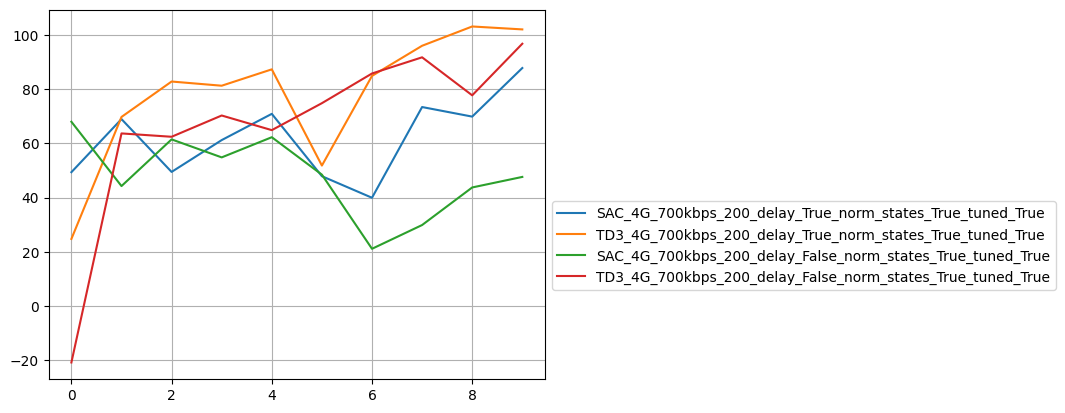

In [11]:
plt.figure()
for i, row in df[((df.trace == "4G_700kbps") & \
                  (df.last_reward > 0) & \
                 (df.step_time == 200) & \
                 (df.tuned == True))
                ].iterrows():
    name = row["name"]
    data = row.cum_reward
    print(name)
    plt.plot(data, label=name)
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))

SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_False
SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_False
TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_False


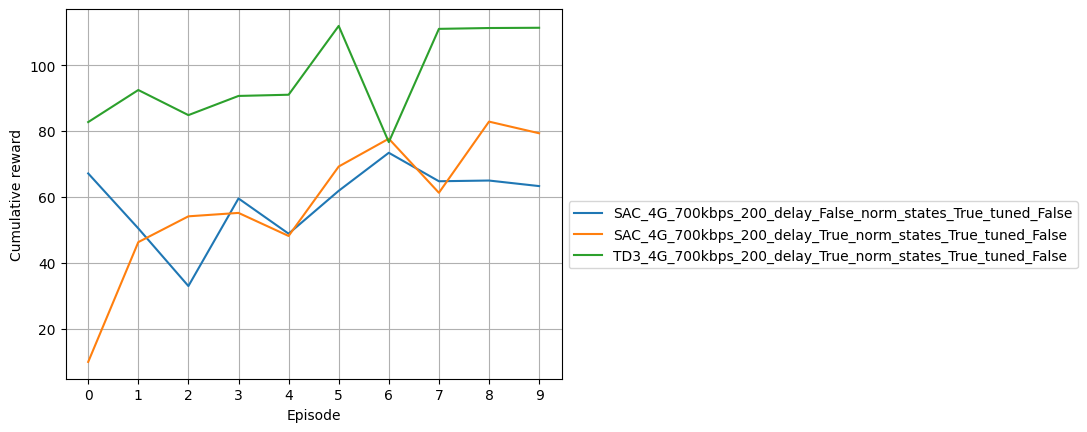

In [12]:
plt.figure()
for i, row in df[(df.trace == "4G_700kbps") & \
                 (df.last_reward > 0) & \
                 (df.step_time == 200) & \
                 (df.tuned == False)
                ].iterrows():
    name = row["name"]
    data = row.cum_reward
    print(name)
    plt.plot(data, label=name)
    plt.xticks(range(10), range(10))
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))

TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_False


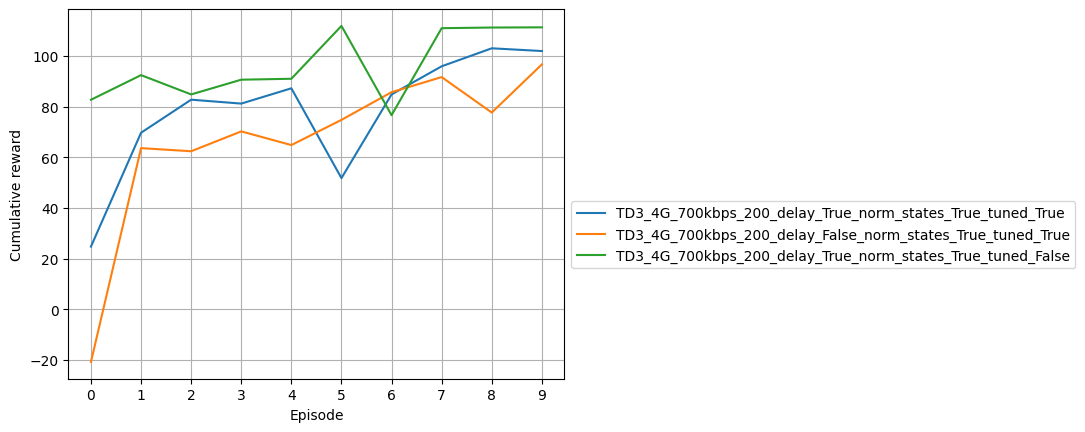

In [18]:
plt.figure()
for i, row in df[(df.trace == "4G_700kbps") & \
                 (df.last_reward > 0) & \
                 (df.step_time == 200) & \
                 (df.alg == "TD3") & \
                 (df.normalize_states == True)
                ].iterrows():
    name = row["name"]
    data = row.cum_reward
    print(name)
    plt.plot(data, label=name)
    plt.xticks(range(10), range(10))
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))

In [85]:
df.trace.unique()

array(['WIRED_200kbps', 'WIRED_900kbps', '4G_700kbps', 'WIRED_35mbps',
       '4G_3mbps'], dtype=object)

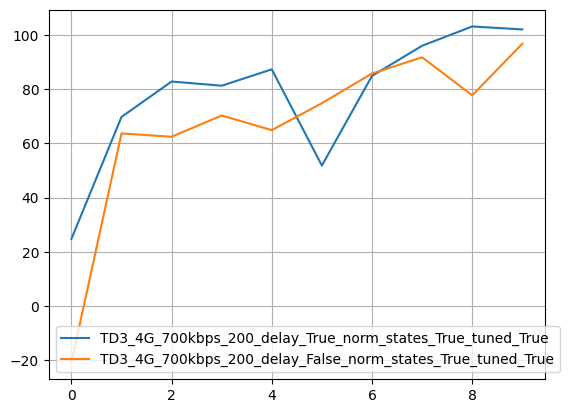

In [16]:
plt.figure()
for i, row in df[
                # (df.trace == "4G_3mbps") & \
                #  (df.last_reward > 0) & \
                #  (df.step_time == 400) & \
                #  (df.alg == "TD3") & \
                #  (df.delay_states == True)
    (df["name"] == "TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True") | \
    (df["name"] == "TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True")
                ].iterrows():
    name = row["name"]
    data = row.cum_reward
    plt.plot(data, label=name)
    
plt.grid()
plt.legend()

In [159]:
df.trace.value_counts()

WIRED_900kbps    72
WIRED_200kbps    65
WIRED_35mbps     56
4G_700kbps       24
4G_3mbps         11
Name: trace, dtype: int64